### Medical Data Visualizer

This is part of the [freeCodeCamp Projects](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer) and Dataset can also be found on: https://www.kaggle.com/datasets/chandanchugh/fccmedicaldatavisualizer

In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

### Instructions
•Create a chart where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

•Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

•Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.
Draw the Categorical Plot

•Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.

•Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

•Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: sns.catplot().

•Draw the Heat Map in the draw_heat_map function.

•Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data: diastolic pressure is higher than systolic
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile

•Calculate the correlation matrix and store it in the corr variable.

•Generate a mask for the upper triangle and store it in the mask variable.

•Set up the matplotlib figure.

•Plot the correlation matrix


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv(r"your_path\medical_examination.csv")

In [3]:
df['overweight'] = df["weight"]/(df["height"]/100)**2
df["overweight"]= np.where(df["overweight"] > 25, 1, 0)

# 3 Normalize data
df["cholesterol"]=np.where(df["cholesterol"]==1, 0, 1)
df["gluc"]=np.where(df["gluc"]==1, 0, 1)

In [4]:
df_cat=df[["id", 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight', "cardio"]]
df_cat = pd.melt(df, id_vars=["cardio"], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'],
                 var_name='variable', value_name='value')

In [5]:
df_cat_grouped=df_cat.groupby(["cardio", "variable", "value"]).size().reset_index(name="Total")

c:\Users\Dellia\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Dellia\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Dellia\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

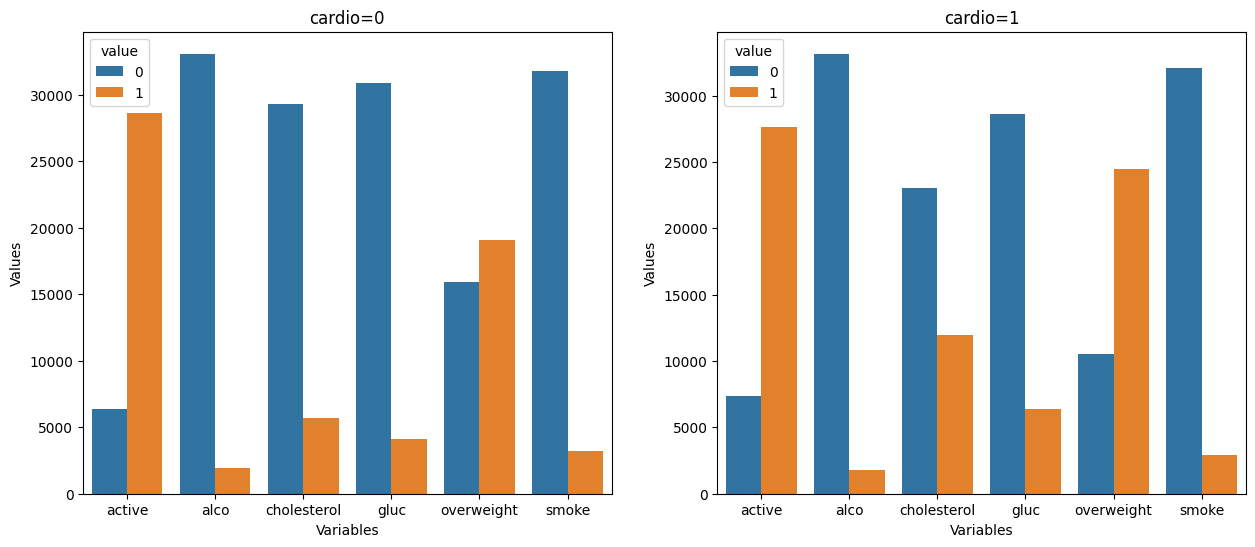

In [6]:
fig, axes = plt.subplots(1,2, figsize=(15,6), sharey=False)

sns.barplot(df_cat_grouped[df_cat_grouped["cardio"]==0],
            x="variable",
            y="Total",
            hue="value",
            ax=axes[0])

axes[0].set_title("cardio=0")
axes[0].set_ylabel("Values")
axes[0].set_xlabel("Variables")

sns.barplot(df_cat_grouped[df_cat_grouped["cardio"]==1],
            x="variable",
            y="Total",
            hue="value",
            ax=axes[1])

axes[1].set_title("cardio=1")
axes[1].set_ylabel("Values")
axes[1].set_xlabel("Variables")

fig.savefig('catplot.png')


In [8]:
df_heat=df[(df['ap_lo'] <= df['ap_hi'])]
df_heat=df[(df['height'] >= df['height'].quantile(0.025))]
df_heat=df[(df['height'] <= df['height'].quantile(0.975))]
df_heat=df[(df['weight'] >= df['weight'].quantile(0.025))]
df_heat=df[(df['weight'] <= df['weight'].quantile(0.975))]

In [9]:
corr = df_heat.corr()

In [10]:
corr.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'],
      dtype='object')

In [11]:
# Create mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#Redondeo triangulo inferior de la matri
corr2=round(pd.DataFrame(np.tril(corr),index=corr.index, columns=corr.columns), 2)


<Axes: >

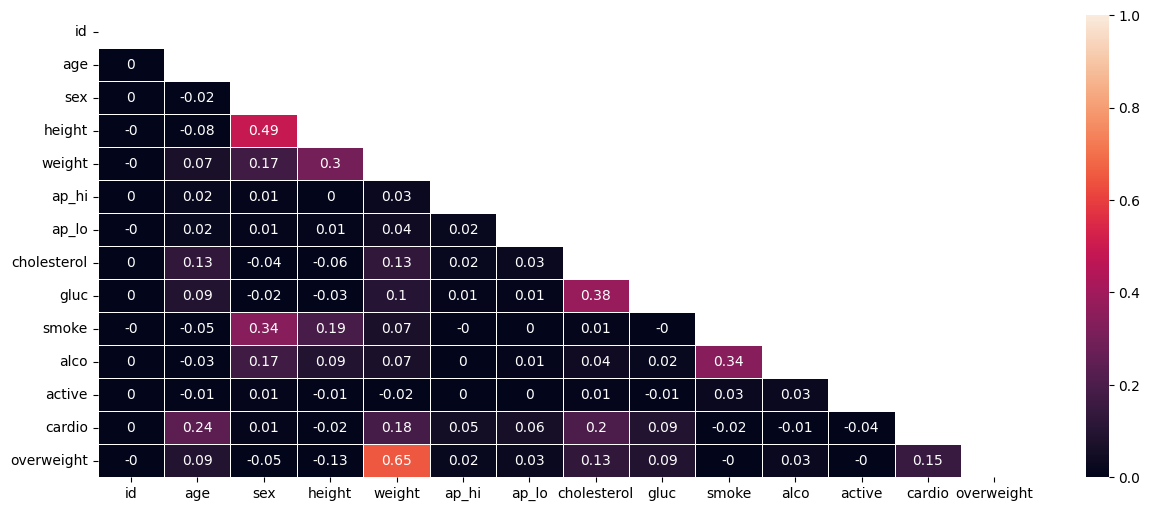

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,6))
sns.heatmap(corr2, 
            annot=True,
             mask=mask,
             vmax=1,
             vmin=0,
             linewidths=0.5,
             )